In [1]:
%store -r unlabeled_normalized_df

In [2]:
import sagemaker
from sagemaker import get_execution_role

session = sagemaker.Session()
role = get_execution_role()
bucket = session.default_bucket()

In [6]:
from sagemaker import PCA

estimator = PCA(
    role=role,
    instance_count=1,
    instance_type='ml.c4.xlarge',
    num_components=2,
    sagemaker_session=session)

In [8]:
data_np = unlabeled_normalized_df.values.astype('float32')
record_set = estimator.record_set(data_np)

In [9]:
estimator.fit(record_set)

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2021-04-18 07:33:48 Starting - Starting the training job...ProfilerReport-1618731227: InProgress
...
2021-04-18 07:34:31 Starting - Launching requested ML instances......
2021-04-18 07:35:45 Starting - Preparing the instances for training............
2021-04-18 07:37:32 Downloading - Downloading input data
2021-04-18 07:37:32 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/18/2021 07:37:57 INFO 140097614255936] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'algorithm_mode': 'regular', 'subtract_mean': 'true', 'extra_components': '-1', 'force_dense': 'true', 'epochs': 1, '_log_level': 'info', '_kvstore': 'dist_sync', '_num_kv_servers': 'auto', '_num_gpus': 'auto'}
[04/18/2021 07:37:57 INFO 140097614255936] Merging with provided configuration from /opt/ml/input/config/hyperparameters.json: {'feature_dim': '5', 'num_component


2021-04-18 07:38:11 Uploading - Uploading generated training model
2021-04-18 07:38:11 Completed - Training job completed
Training seconds: 50
Billable seconds: 50


In [10]:
predictor = estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-----------------------!

In [11]:
results = predictor.predict(data_np)
results

[label {
   key: "projection"
   value {
     float32_tensor {
       values: -0.48789161443710327
       values: 0.011455059051513672
     }
   }
 },
 label {
   key: "projection"
   value {
     float32_tensor {
       values: -0.4503028988838196
       values: 0.12702858448028564
     }
   }
 },
 label {
   key: "projection"
   value {
     float32_tensor {
       values: 0.31829965114593506
       values: 0.9820671081542969
     }
   }
 },
 label {
   key: "projection"
   value {
     float32_tensor {
       values: 0.028231695294380188
       values: 0.885252058506012
     }
   }
 },
 label {
   key: "projection"
   value {
     float32_tensor {
       values: 0.06837558001279831
       values: -0.772600531578064
     }
   }
 },
 label {
   key: "projection"
   value {
     float32_tensor {
       values: -0.10898938775062561
       values: 0.9943870306015015
     }
   }
 },
 label {
   key: "projection"
   value {
     float32_tensor {
       values: 0.12694065272808075
       va

In [12]:
results[0].label['projection'].float32_tensor.values

[-0.48789161443710327, 0.011455059051513672]

In [13]:
def extract_values(item):
    projection = item.label['projection']
    pair = projection.float32_tensor.values
    x = pair[0]
    y = pair[1]
    
    return {
        "x": x,
        "y": y
    }

In [14]:
new_xs = []
new_ys = []

for result in results:
    x_and_y = extract_values(result)
    new_xs.append(x_and_y["x"])
    new_ys.append(x_and_y["y"])

In [17]:
new_xs[0:5]

[-0.48789161443710327,
 -0.4503028988838196,
 0.31829965114593506,
 0.028231695294380188,
 0.06837558001279831]

In [18]:
new_ys[0:5]

[0.011455059051513672,
 0.12702858448028564,
 0.9820671081542969,
 0.885252058506012,
 -0.772600531578064]

In [20]:
import pandas as pd

new_df = pd.DataFrame({
    "new_x": new_xs,
    "new_y": new_ys
})

new_df

,new_x,new_y
0,-0.487892,0.011455
1,-0.450303,0.127029
2,0.318300,0.982067
3,0.028232,0.885252
4,0.068376,-0.772601
5,-0.108989,0.994387
6,0.126941,1.167509
7,0.055823,0.930639
8,0.149028,-0.212061
9,-0.114709,-0.683099


<AxesSubplot:xlabel='new_x', ylabel='new_y'>

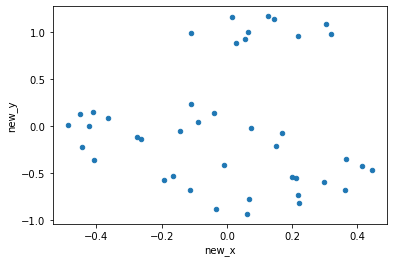

In [21]:
new_df.plot.scatter(x="new_x", y="new_y")